In [ ]:
## Recommend Movies ##  

dataset https://www.kaggle.com/grouplens/movielens-20m-dataset  
The code of this nootbook is referenced from https://www.datacamp.com/community/tutorials/recommender-systems-python
    
Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.  

What's more, for some companies like Netflix, Amazon Prime, Hulu, and Hotstar, the business model and its success revolves around the potency of their recommendations. Netflix even offered a million dollars in 2009 to anyone who could improve its system by 10%.  

There are also popular recommender systems for domains like restaurants, movies, and online dating. Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services. YouTube uses the recommendation system at a large scale to suggest you videos based on your history. For example, if you watch a lot of educational videos, it would suggest those types of videos.  


- **Simple recommenders**: offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.  
    
- **Content-based recommenders**: suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she wil  l also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.
    
- **Collaborative filtering engines**: these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.  
    
    

### Simple Recommenders ###   

As described in the previous section, simple recommenders are basic systems that recommend the top items based on a certain metric or score. In this section, you will build a simplified clone of IMDB Top 250 Movies using metadata collected from IMDB.  

The following are the steps involved:  

Decide on the metric or score to rate movies on.  

Calculate the score for every movie.  

Sort the movies based on the score and output the top results.  

### Recommender Systems: ###
1. User Based Recommender Systems
2. Item Based Recommender Systems

A recommender system is a subclass of information filtering system that seeks to predict the "rating" a user would give to an item. 
Mainly three types of recommendation systems in machine learning.

1. Content Filtering: In this algorithm, we try finding items look alike.
2. Collaborative Filtering: we try to search for look alike customers and offer products based on what his/her lookalike has chosen. This algorithm is very effective but takes a lot of time and resources.
3. Hybrid Filtering: 



### About the Dataset ###  


In [2]:
# load data
import pandas as pd
import os

# show input files
print(os.listdir("input"))

['genome_scores.csv', 'genome_tags.csv', 'link.csv', 'movie.csv', 'rating.csv', 'tag.csv']


In [2]:
# Load tag
tag = pd.read_csv('input/tag.csv')
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [21]:
# Load genome_tags 
genome_scores = pd.read_csv('input/genome_scores.csv')
genome_scores.query('relevance>0.95').head(10)

,movieId,tagId,relevance
63,1,64,0.98575
185,1,186,0.95650
203,1,204,0.96425
243,1,244,0.99850
587,1,588,0.97925
588,1,589,0.99075
784,1,785,0.96675
785,1,786,0.99600
1035,1,1036,0.99925
1156,2,29,0.98100


In [22]:
# Load genome_tags
genome_tags = pd.read_csv('input/genome_tags.csv')
genome_tags.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [8]:
genome_tags.shape

(1128, 2)

In [5]:
# Load link
link = pd.read_csv('input/link.csv')
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [31]:
# Load Movies
movie = pd.read_csv('input/movie.csv')
movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [33]:
# merge genome_scores & genome_tags => add tag column
df_tag = pd.merge(genome_scores, genome_tags)
df_tag.head(10)

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,2,1,0.03975,007
2,3,1,0.04350,007
3,4,1,0.03725,007
4,5,1,0.04200,007
5,6,1,0.02825,007
6,7,1,0.04575,007
7,8,1,0.03075,007
8,9,1,0.03500,007
9,10,1,0.99975,007


In [59]:
rating = pd.read_csv('input/rating.csv')
rating.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [13]:
# display 10 action movies
is_action=movie['genres'].str.contains('Action')
movie[is_action][0:10]

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


In [14]:
# only keep movie id and title
movie = movie.loc[:,["movieId","title"]]
movie.head(5)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [45]:
# we only need userId, moveId, rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4B8982D30>]],
      dtype=object)

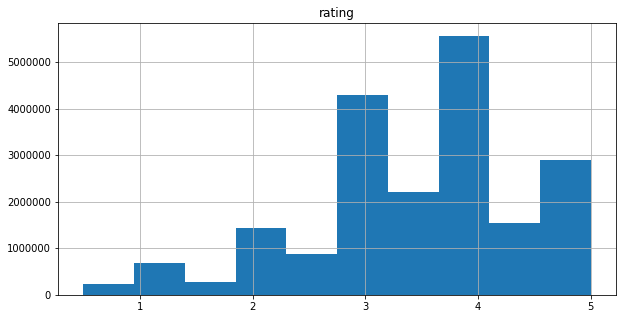

In [46]:
# view rating data
rating.hist(column='rating', figsize=(10,5))

In [18]:
# view average rating
average_rating = rating[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [54]:
# view average rating for each movie
movie_count = rating[['movieId','rating']].groupby('movieId').count()
movie_count.head(20)

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
6,23899
7,12961
8,1415
9,3960


In [50]:
### Merge table movie and rating ###
movie_details=movie.merge(rating,on='movieId')

In [51]:
movie_details.head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0


In [58]:
# veiw average rating with movie title
movie_rating_avg = movie_details[['title','rating']].groupby('title').mean()
movie_rating_avg.head(20)


,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000
'71 (2014),3.657143
'Hellboy': The Seeds of Creation (2004),3.028736
"'Human' Factor, The (Human Factor, The) (1975)",2.250000
'Neath the Arizona Skies (1934),2.318182


In [93]:
# merge the movie and rating table
data = pd.merge(movie, rating)
data.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [94]:
data.shape

(20000263, 6)

In [95]:
# there are 20 million data, it is too much. reduce it to 1 M.
data = data.iloc[:1000000,:]
data.shape

(1000000, 6)

In [96]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = data.pivot_table(index = ["userId"], columns = ["title"], values="rating")
pivot_table.head(10)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:

movie_watched = pivot_table["Bad Boys (1995)"]
#movie_watched = pivot_table["Superbad (2007)"]


similarity_with_other_movies = pivot_table.corrwith(movie_watched)
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Bad Boys (1995)                        1.000000
Headless Body in Topless Bar (1995)    0.723747
Last Summer in the Hamptons (1995)     0.607554
Two Bits (1995)                        0.507008
Shadows (Cienie) (1988)                0.494186
dtype: float64

In [ ]:
# list all available tags
pd.set_option('max_rows', 20)
pd.set_option('min_rows', 20)
tags = genome_tags.groupby('tag')
tags.head(20)

In [102]:
# merge df_tag & movie => add title and genres columns
df_tag_movie = pd.merge(df_tag, movie)

# filter the result only show relevance>0.95, so we can compare the tag with the genres
df_merge = df_tag_movie.query('relevance>0.95')
df_merge.query('tag=="action"')

,movieId,tagId,relevance,tag,title,genres
9042,9,19,0.97450,action,Sudden Death (1995),Action
10170,10,19,0.96600,action,GoldenEye (1995),Action|Adventure|Thriller
15810,15,19,0.98200,action,Cutthroat Island (1995),Action|Adventure|Romance
24834,23,19,0.96050,action,Assassins (1995),Action|Crime|Thriller
48522,44,19,0.96725,action,Mortal Kombat (1995),Action|Adventure|Fantasy
103794,95,19,0.99000,action,Broken Arrow (1996),Action|Adventure|Thriller
148914,145,19,0.98850,action,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller
169218,163,19,0.98050,action,Desperado (1995),Action|Romance|Western
171474,165,19,0.98825,action,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
215466,204,19,0.97950,action,Under Siege 2: Dark Territory (1995),Action


In [101]:
# merge title, tag, rating
df_tag_movie_ratting =  pd.merge(df_merge, rating)
df_tag_movie_ratting

,movieId,tagId,relevance,tag,title,genres,userId,rating,timestamp
0,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
5,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,1997-03-22 20:48:38
6,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,1996-11-27 08:21:31
7,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,2008-10-29 20:13:59
8,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,2001-05-27 13:22:52
9,1,64,0.98575,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,1997-02-05 21:03:48


In [ ]:
# show the average rating for each movie
df_tag_movie_ratting.head()
movie_avg_rating = df_tag_movie_ratting.groupby('title').mean()

# show all movies sorted by rating
movie_avg_rating.sort_values('rating', ascending=False)